# Machine Learning - Supervised Learning (Classification)


## K Means Clustering

#### Author : Sarthak Singh

Stepwise Method:

1. Preapare X (Input) and Y (output)

Initially we have a dataset by which we can prepare a model 
and that model should be capable in classifying the flower into correct group 

2. Import machine learning algorithm 

We need to choose which machine learning algorithm should we use in the preparation of this model 

3. Train the Machine Learning model - fit 

Training the machine learning model using a method known as model.fit()

4. Score - Accuracy

model.score - used to check the accuracy of the model.

5. Predict 

after validation, model is now ready to predict base on the new input given 


In [3]:
#Importing the necessary data libraries 

import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set(style="white", color_codes = True)
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

In [4]:
#dataframe

iris = pd.read_csv("E:\Documents E\Datasets\Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
# count

iris["Species"].value_counts()

# the data is not biased all species have equal counts and all are of type integer

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
# computer a machine dosen't undersatnd words, so we will give the groups a number using a dictionary

# iris-setosa will be class 0
# iris-versicolor will be class 1
# iris-virginica will be class 2

flower_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica' : 2}
iris["Species"] = iris["Species"].map(flower_mapping)


In [9]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


## K Means clustering

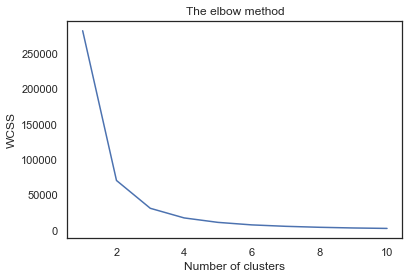

In [5]:
# Finding the optimum number of clusters for k-means classification

x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [6]:
# Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

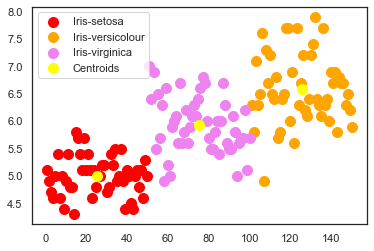

In [11]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'violet', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()